# Prosper Loan Analysis
## by Noaman Mangera

## Investigation Overview

> The Prosper loan dataset is examined to find out what factors contribute to a lower rate of interest on a loan.

## Dataset Overview

> The Prosper loan dataset consists of about 113,000 records (loans) with 81 rows (features).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings 
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset 
df = pd.read_csv(r"C:\Users\noama\prosperLoanData.csv")

In [3]:
#isolate variables of interest  
columns = ['MemberKey', 'BorrowerAPR', 'CreditGrade', 'Term', 'ProsperScore', 'EmploymentStatus', 'EmploymentStatusDuration'
           , 'OpenRevolvingAccounts', 'CurrentDelinquencies', 'AmountDelinquent', 'DebtToIncomeRatio', 'Recommendations', 'InvestmentFromFriendsCount'
           , 'InvestmentFromFriendsAmount', 'PercentFunded', 'Investors']

#create a new df with subset of vairables
sub_df = df.loc[:, columns]

In [4]:
# convert Credit Grade and Prosper Score into ordered categorical types
ordinal_var_dict = {'CreditGrade': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'],
                    'ProsperScore': [11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0],
                    'Term': [12, 36, 60],
                    'EmploymentStatus': ['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other',
                                         'Part-time', 'Not employed', 'Retired']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    sub_df[var] = sub_df[var].astype(ordered_var)

## How is Borrower APR distributed?

- BorrowerAPR is normally distributed with a slight left skew
- There's a large spike around 0.36 %

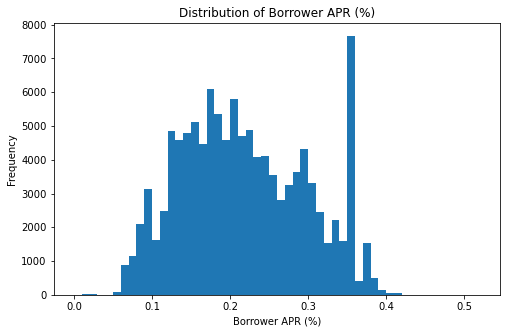

In [5]:
# distribution of main variable of interest
binsize = 0.01
bins = np.arange(0, sub_df['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = sub_df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Borrower APR (%)');

## What factors contribute to a loan's interest rate?

1. A subset of features are explored. 
2. No single numerical variable strongly correlated with the rate of interest.
3. DebtToIncomeRatio is not correlated at all.

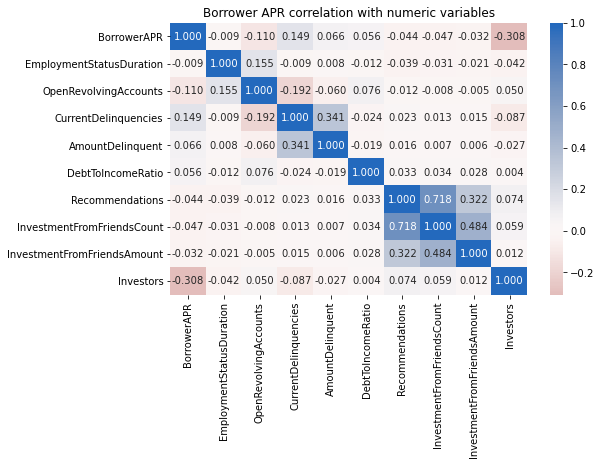

In [6]:
numeric_vars = ['BorrowerAPR', 'Term', 'ProsperScore', 'EmploymentStatusDuration' , 'OpenRevolvingAccounts', 'CurrentDelinquencies',
                'AmountDelinquent', 'DebtToIncomeRatio', 'Recommendations', 'InvestmentFromFriendsCount'
                , 'InvestmentFromFriendsAmount', 'Investors']

categoric_vars = ['CreditGrade', 'Term', 'EmploymentStatus', 'ProsperScore']

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(sub_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title('Borrower APR correlation with numeric variables')


plt.yticks(rotation=0);
plt.show() 

## How can an applicant maximise their chances of a lower rate of interest?

- Aim for a high ranked Prosper Score.

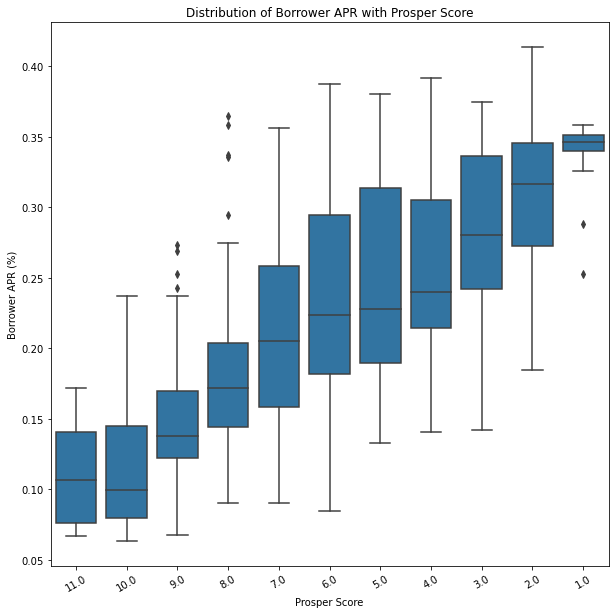

In [15]:
#draw random sample of 500 observations
samples = np.random.choice(sub_df.shape[0], 2000, replace = False)
loans_samp = sub_df.loc[samples,:]

plt.figure(figsize = [10, 10])
default_color = sb.color_palette()[0]
sb.boxplot(loans_samp['ProsperScore'], loans_samp['BorrowerAPR'], color = default_color)
plt.xticks(rotation=30)
plt.title('Distribution of Borrower APR with Prosper Score')
plt.ylabel('Borrower APR (%)')
plt.xlabel('Prosper Score');

## What else can an applicant do to maximise their chances of a lower rate of interest?

1. Take shorter Term loan

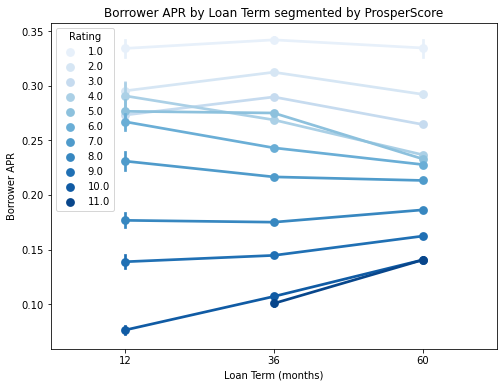

In [16]:
# Create a pointplot to show how the BorrowerRate changes for different loan Terms
# when split up by ProsperRating
fig = plt.figure(figsize=[8,6])

ax = sb.pointplot(data=df, x='Term', y='BorrowerAPR', hue='ProsperScore',
                   palette='Blues');
plt.legend(loc=2, title='Rating')
plt.ylabel('Borrower APR')
plt.xlabel('Loan Term (months)')
plt.title('Borrower APR by Loan Term segmented by ProsperScore');